In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import os
project_path = os.getcwd() # Ubicación del proyecto

# Load Data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = f'{project_path}/Super_Store_data.csv'
df = pd.read_csv(file_path, index_col=[0], parse_dates=['Ship Date', 'Order Date'])
print(df.shape)
df.head()

(2121, 21)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Coordinates
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-12,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,1.0000,2,0.00,41.9136,"(37.8393, -84.27)"
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1.0000,1,0.00,219.5820,"(37.8393, -84.27)"
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,"(27.9944, -81.7603)"
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,1,0.00,14.1694,"(36.7783, -119.4179)"
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,"(36.7783, -119.4179)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 1 to 9991
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       2121 non-null   object        
 1   Order Date     2121 non-null   datetime64[ns]
 2   Ship Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Product Name   2121 n

# EDA

<Axes: >

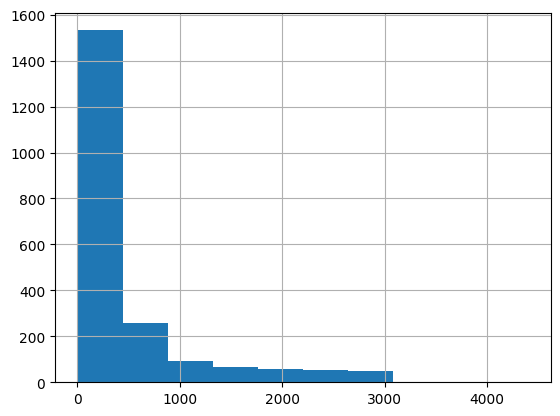

In [ ]:
df.Sales.hist()

In [ ]:
df['Order Date', 'Ship Date', 'Sales', 'State', 'City', 'Segment', 'Ship Mode', 'Profit', 'Custumer ID']

KeyError: ('Order Date', 'Ship Date', 'Sales', 'State', 'City', 'Segment', 'Ship Mode', 'Profit', 'Custumer ID')

In [ ]:
# ¿cuantas veces se repite en el dataset su respectivo valor de 'Order ID'?

order_repetitions = df.groupby('Order ID')['Order ID'].transform('count')
order_repetitions.unique()
# Como máximo incluyen 4 artículos diferentes en el carrito

array([2, 1, 3, 4])

<Axes: >

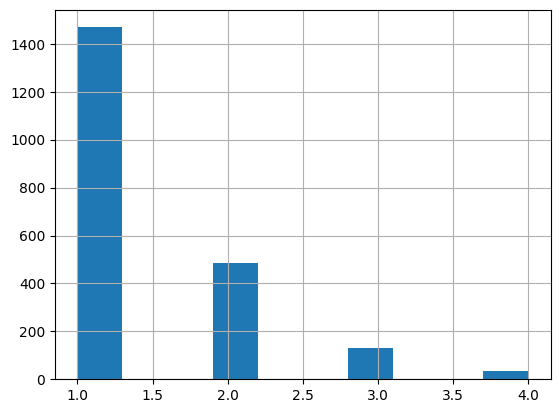

In [ ]:
# La mayoría de compras se hacen con solo 1 producto
order_repetitions.hist()

In [ ]:
productName_per_id = df.groupby('Product Name')['Product ID'].nunique()
productName_per_id[productName_per_id > 1]
# Hay productos asociados a IDs diferentes

Product Name
Eldon Wave Desk Accessories      2
Eldon Wave Desk Accessories--    2
KI Adjustable-Height Table       2
Staple-based wall hangings       2
Name: Product ID, dtype: int64

In [ ]:
# Cantidad de productos en venta
print(f"Cantidad total de productos: {df['Product Name'].unique().shape[0]}\n\nCantidad por Subcategoría:")
df.groupby('Sub-Category')['Product Name'].nunique()

Cantidad total de productos: 541

Cantidad por Subcategoría:


Sub-Category
Bookcases       73
Chairs         127
Furnishings    259
Tables          82
Name: Product Name, dtype: int64

<Axes: xlabel='Order Date'>

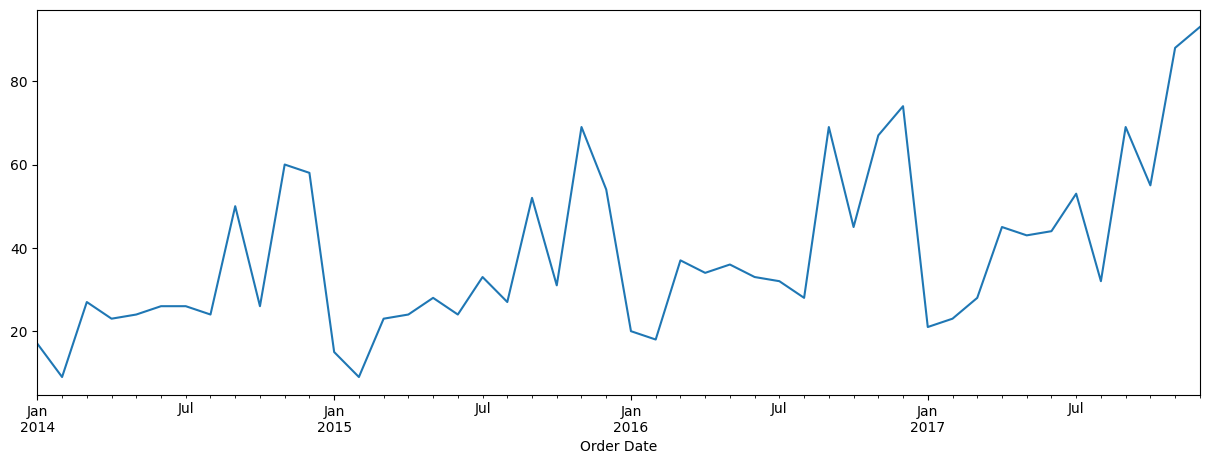

In [ ]:
# Tendencia general de la cantidad de compras que hacen los usuarios

df.groupby('Order Date')['Order ID'].nunique().groupby(pd.Grouper(freq='M')).sum().plot(figsize=(15, 5))
# Notamos que es una tendencia creciente y multiplicativa
# Diciembre siempre es nuestro pico respecto al resto de meses
# El 2do pico más grande corresponde a Septiembre
# A inicios del año hay un bajón en las ventas

# Data for preprocesing

In [ ]:
necessary_features = ['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Coordinates', 'State', 'City', 'Segment', 'Ship Mode', 'Sub-Category', 'Product ID', 'Product Name', 'Discount', 'Sales', 'Quantity', 'Profit']
df2 = df.loc[:, necessary_features]
df2.loc[:, 'Product Name'] = df2['Product Name'].str.replace('--', '')

print(df2.shape)
df2.head()

(2121, 16)


,Order ID,Customer ID,Order Date,Ship Date,Coordinates,State,City,Segment,Ship Mode,Sub-Category,Product ID,Product Name,Discount,Sales,Quantity,Profit
Row ID,,,,,,,,,,,,,,,,
1,CA-2016-152156,CG-12520,2016-11-12,2016-11-11,"(37.8393, -84.27)",Kentucky,Henderson,Consumer,Second Class,Bookcases,FUR-BO-10001798,Bush Somerset Collection Bookcase,0.00,1.0000,2,41.9136
2,CA-2016-152156,CG-12520,2016-11-08,2016-11-11,"(37.8393, -84.27)",Kentucky,Henderson,Consumer,Second Class,Chairs,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.00,1.0000,1,219.5820
4,US-2015-108966,SO-20335,2015-10-11,2015-10-18,"(27.9944, -81.7603)",Florida,Fort Lauderdale,Consumer,Standard Class,Tables,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,0.45,957.5775,5,-383.0310
6,CA-2014-115812,BH-11710,2014-06-09,2014-06-14,"(36.7783, -119.4179)",California,Los Angeles,Consumer,Standard Class,Furnishings,FUR-FU-10001487,Eldon Expressions Wood and Plastic Desk Access...,0.00,48.8600,1,14.1694
11,CA-2014-115812,BH-11710,2014-06-09,2014-06-14,"(36.7783, -119.4179)",California,Los Angeles,Consumer,Standard Class,Tables,FUR-TA-10001539,Chromcraft Rectangular Conference Tables,0.20,1706.1840,9,85.3092


# Pruning

## Criterio: `Sales`

Dividiremos en 3 partes para que

### Valores de venta muy pequeños  **y**  Profit (Ganancias) ilógicas

Es imposible que la ganancia de una venta sea mucho mayor al precio que cobraste por ella. Esto se explica con la ecuación:

`profit = income - cost_of_production`

Para que `profit > income` → `cost_of_production < 0`. **Por absurdo** esto es falso, por lo que descartamos los registros con estos valores.

In [ ]:
df2 = df2[(df2.Sales>df2.Profit) & (df2.Sales>1)]

### Outliers

Dividiremos en 3 partes devido a que el análisis de outliers depende de la cantidad de registros que poseamos de nuestros grupos

In [ ]:
# Creamos columnas útiles para el análisis de outliers para los 3 casos a continuación

df2['unit_value'] = df2.Sales/df2.Quantity
df2['orderId_count'] = df2.groupby('Product ID')['Order ID'].transform('nunique')
df2['unit_value_median'] = df2.groupby('Product ID')['unit_value'].transform('median')

#### Identificamos Outliers

##### Para valores atipicos para productos que han sido comprado solo 2 veces

Al poseer solo 2 registros por grupo es totalmente imposible aplicar IQR y la media aquí no tiene sentido porque tendrá la misma ditancia entre los dos valores.

Debido a esto, solo eliminaremos los valores relativamente más lejanos al valor máximo entre los dos.

In [ ]:
mask_repeated_2 = df2.orderId_count==2

max_val = df2.groupby('Product ID')['unit_value'].transform('max')
min_val = df2.groupby('Product ID')['unit_value'].transform('min')
absolute_difference_2 = np.abs(min_val/max_val -1)

condition_repeated_2 = (absolute_difference_2<=0.4) & mask_repeated_2

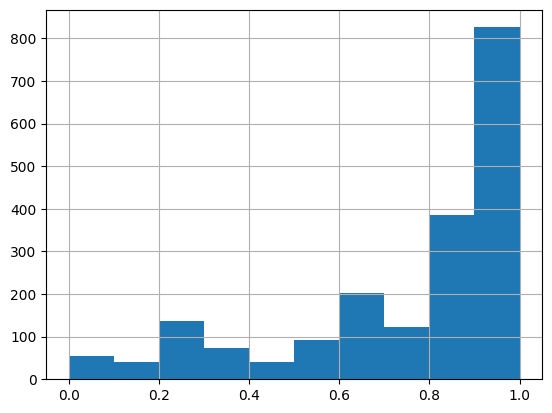

In [ ]:
absolute_difference_2.hist()
plt.show()

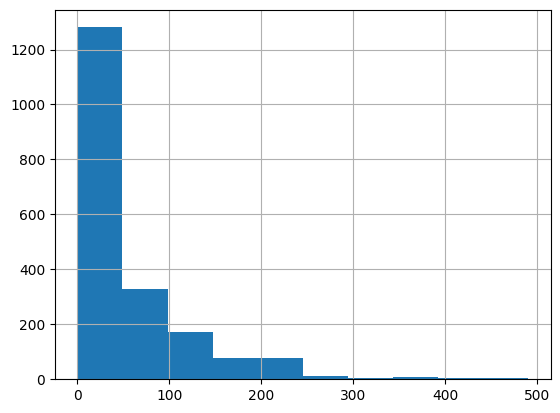

In [ ]:
min_val.hist()
plt.show()

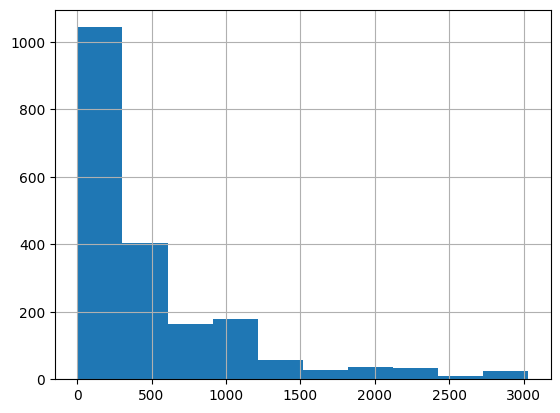

In [ ]:
max_val.hist()
plt.show()

##### Para valores atípicos para productos que han sido comprados de 3 - 5 veces

Por tener pocos datos aún no podemos aplicar método de IQR.

Debido a esto, aplicamos nuestra medida de distancia relacionada a la mediana. `absolute_difference_2_5` responde a ¿Cuál es el % absoluto de diferencia entre el valor analizada y la mediana del grupo?

Este valor puede ser positivo si `unit_value > unit_value_median` y negativo en el caso contrario. Por eso es necesario aplicar un valor absoluto a la operación.

In [ ]:
mask_repeated_3_5 = (df2.orderId_count>2) & (df2.orderId_count<6)
absolute_difference_3_5 = np.abs(df2.unit_value/df2.unit_value_median -1)

condition_repeated_3_5 = (absolute_difference_3_5<=0.4) & mask_repeated_3_5

<Axes: >

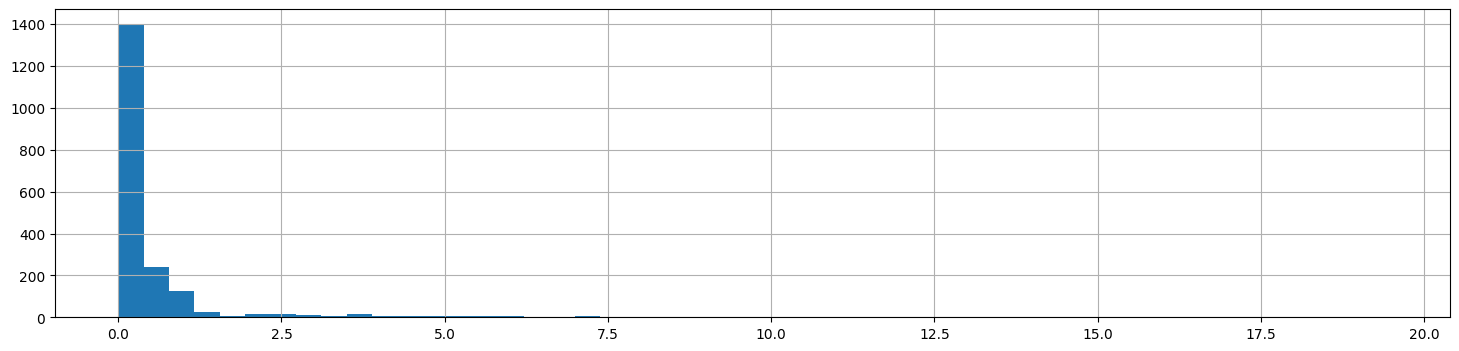

In [ ]:
absolute_difference_3_5[absolute_difference_3_5<20].hist(bins=50, figsize=(18, 4))

##### Para valores atípicos para productos que han sido comprados de 6 o más veces

In [ ]:
# Funciones para calcular el Rango Intercuatil

th = 1.5
def lower_bound(x):
    x = x.copy(deep=True)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    return Q1 - th * (Q3 - Q1)

def upper_bound(x):
    x = x.copy(deep=True)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    return Q1 + th * (Q3 - Q1)

In [ ]:
mask_repeated_6more = df2.orderId_count>5

lower_bound_values = df2.groupby('Product ID')['unit_value'].transform(lower_bound)
upper_bound_values = df2.groupby('Product ID')['unit_value'].transform(upper_bound)

condition_repeated_6more = ((df2.unit_value > lower_bound_values) & (df2.unit_value < upper_bound_values)) & mask_repeated_6more

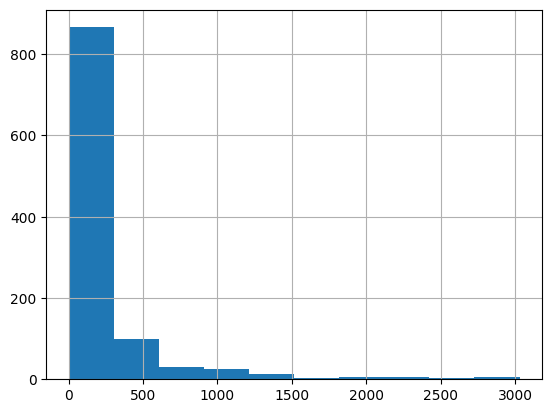

In [ ]:
df2[~condition_repeated_6more].unit_value.hist()
plt.show()

#### Eliminamos los outliers

In [ ]:
df2 = df2[(df2.orderId_count==1) | condition_repeated_2 | condition_repeated_3_5 | condition_repeated_6more].copy(deep=True)
df2.drop(['orderId_count', 'unit_value_median'], axis=1, inplace=True)

print(f'Antes de eliminar outliers: {df.shape}')
print(f'Luego de eliminar outliers: {df2.shape}')
print(f'Total de registros eliminados: {df.shape[0]-df2.shape[0]}\n\n')
df2.info()

Antes de eliminar outliers: (2121, 21)
Luego de eliminar outliers: (1474, 17)
Total de registros eliminados: 647


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 4 to 9990
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1474 non-null   object        
 1   Customer ID   1474 non-null   object        
 2   Order Date    1474 non-null   datetime64[ns]
 3   Ship Date     1474 non-null   datetime64[ns]
 4   Coordinates   1474 non-null   object        
 5   State         1474 non-null   object        
 6   City          1474 non-null   object        
 7   Segment       1474 non-null   object        
 8   Ship Mode     1474 non-null   object        
 9   Sub-Category  1474 non-null   object        
 10  Product ID    1474 non-null   object        
 11  Product Name  1474 non-null   object        
 12  Discount      1474 non-null   float64       
 13  Sales         1474 non-

# Feature Engeniering

## Feature Creation

Recordemos que anteriormente, en la sección de **Prunning** ya creamos `'unit_value'`

Este valor representa el valor unitario de precio a la venta del producto.

### Date features

In [ ]:
#@title <code>'Season'</code> en la que la orden se efectuó

# adding the season in base of the month
for index, date in df2['Order Date'].items():
  if(date.month>=3 and date.month<6):
    df2.at[index, "Season"]='Spring'
  elif(date.month>=6 and date.month<9):
    df2.at[index, "Season"]='Summer'
  elif(date.month>=9 and date.month<12):
    df2.at[index, "Season"]='Fall'
  else:
   df2.at[index, "Season"]='Winter'

In [ ]:
#@title <code>'period'</code> entre la fecha de compra más reciente realizada y la fecha de facturación

maxfecha = df2['Order Date'].max() # esta fecha se corresponde con la transacción (compra) más reciente realizada por cualquier cliente
df2['period'] = maxfecha - df2['Order Date']

In [ ]:
#@title <code>'year'</code>, <code>'month'</code>, <code>'day_of_week'</code> en el que la orden se efectuó

df2['year'] = df2['Order Date'].dt.year
df2['month'] = df2['Order Date'].dt.month
df2['day_of_week'] = df2['Order Date'].dt.day_of_week

### Order the features

In [ ]:
df2.columns

Index(['Order ID', 'Customer ID', 'Order Date', 'Ship Date', 'Coordinates',
       'State', 'City', 'Segment', 'Ship Mode', 'Sub-Category', 'Product ID',
       'Product Name', 'Discount', 'Sales', 'Quantity', 'Profit', 'unit_value',
       'Season', 'period', 'year', 'month', 'day_of_week'],
      dtype='object')

In [ ]:
features = ['Order ID', 'Customer ID', 'Ship Mode', 'Order Date', 'Ship Date',
            'period', 'Season', 'year', 'month', 'day_of_week', 'Coordinates',
            'State', 'City', 'Segment', 'Sub-Category', 'Product ID', 'Product Name',
            'Discount', 'Sales', 'Quantity', 'unit_value', 'Profit']
df2 = df2[features]
print(df2.shape)


(1474, 22)


## Feature Scaling

# Save Data

In [ ]:
file_name = 'data_cleaned.csv'
path_to_save = os.path.join(project_path, file_name)

df2.to_csv(path_to_save)
